# Course Project - Advanced Topics in Machine Learning
#####  "נושמים לרווחה"
### Yuval Bar-On & Inbal Akerman
---
    
1. [Data Preparation](#section1)

   1. [Data Cleaning and Organization](#section2)
   2. [Feature Engineering](#section3)
   3. [Data Analysis and Conclusions (Visualization)](#section4)

2. [Supervised Analysis : End-to-End Classification Pipeline](#section5)
   1. [Confusion Matrix](#section11)

3. [Unsupervised Analysis](#section6)

   1. [K-means](#section7)
   2. [Agglomerative Clustering](#section8)
   3. [Comparison between the algorithms](#section9)
   4. [Clustering with the Selected Model and Outlier Detection](#section10)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split  
import numpy as np 

In [3]:
url = 'https://github.com/YuvalBaron1997/Course-Project---Advanced-Topics-in-Machine-Learning-/raw/refs/heads/main/data/united.csv'
bf_df = pd.read_csv(url, encoding='ISO-8859-8')
df = bf_df.copy()
df.head()

,שנה,מחוז,רשות,שם רשות,מספר משפחות מקבלות סיוע,סך הכל שימושים,מספר סל המענים בסוג סיוע איבזור הבית והתקנה,סך הכל הוצאה עבור איבזור הבית והתקנה בשח,מספר סל המענים בסוג סיוע ביגוד והנעלה,סך הכל הוצאה עבור ביגוד והנעלה בשח,...,מספר סל המענים בסוג סיוע ריהוט,סך הכל הוצאה עבור ריהוט בשח,מספר שונות,סך הכל הוצאה עבור שונות בשח,מספר סל המענים בסוג סיוע תעסוקה,סך הכל הוצאה עבור תעסוקה בשח,מספר סל המענים בסוג סיוע תחבורה,סך הכל הוצאה הסעה בשח,מספר סל המענים בסוג סיוע פעילות רשותית,סך הכל הוצאה פעילות רשותית בשח
0,2019,דרום,100,אילת,229,1175685.34,289.0,362987.9,748.0,608038.46,...,390.0,595570.2,70,86427.9,219,381530.7,0.0,0,3.0,25762.5
1,2019,דרום,102,באר שבע,1526,12808824.22,703.0,882559.12,2493.0,3185469.26,...,3342.0,5970677.18,265,350841.09,2171,5277289.93,0.0,0,22.0,34132
2,2019,דרום,105,דימונה,475,4697632.05,300.0,314082.5,1651.0,1527661.55,...,1395.0,2456461.94,202,165805.15,814,1289287.5,0.0,0,14.0,17240
3,2019,דרום,106,קרית גת,470,3248601.58,374.0,500587.01,809.0,831583.35,...,1073.0,1717545.27,362,239512.4,590,948567.51,0.0,0,2.0,16800
4,2019,דרום,120,אופקים,213,1399126.4,236.0,183706,427.0,409054.91,...,527.0,782651.87,105,94870.07,382,486603.62,90.0,21390,171.0,82790



<a id='section1'></a>
### 1. Data Preparation


<a id='section2'></a>
* Data Cleaning and Organization

In [ ]:
#df.isnull().sum()

In [4]:
# מילוי אפסים במקום המקומות הריקים לפי ההסבר של הדאטה שלנו באינטרנט  
# החלפת כל הערכים NaN ב-0
df = df.fillna(0)
#print(df.dtypes)

In [5]:
#ChatGPT - הפיכה לאנגלית
column_mapping = {
    'שנה': 'year',
    'מחוז': 'district',
    'רשות': 'city',
    'שם רשות': 'city_name',
    'מספר משפחות מקבלות סיוע': 'num_families_helped',
    'סך הכל שימושים': 'total_uses',
    'מספר סל המענים בסוג סיוע איבזור הבית והתקנה': 'home_improvement_baskets',
    'סך הכל הוצאה עבור איבזור הבית והתקנה בשח': 'home_improvement_expense',
    'מספר סל המענים בסוג סיוע ביגוד והנעלה': 'clothing_baskets',
    'סך הכל הוצאה עבור ביגוד והנעלה בשח': 'clothing_expense',
    'מספר סל המענים בסוג סיוע הוצאה עבור בריאות': 'healthcare_baskets',
    'סך הכל הוצאה עבור בריאות בשח': 'healthcare_expense',
    'מספר סל המענים בסוג סיוע חובות כספיים': 'debt_baskets',
    'סך הכל הוצאה עבור חובות כספיים בשח': 'ebt_expense',
    'מספר סל המענים בסוג סיוע חוגים': 'club_baskets',
    'סך הכל הוצאה עבור חוגים בשח': 'club_expense',
    'מספר סל המענים בסוג סיוע חינוך והשכלה': 'education_baskets',
    'סך הכל הוצאה עבור חינוך והשכלה בשח': 'education_expense',
    'מספר סל המענים בסוג סיוע מוצרי חשמל': 'electronics_baskets',
    'סך הכל הוצאה עבור מוצרי חשמל בשח': 'electronics_expense',
    'מספר סל המענים בסוג סיוע מוצרים חריגים': 'special_items_baskets',
    'סך הכל הוצאה עבור מוצרים חריגים בשח': 'special_items_expense',
    'מספר סל המענים בסוג סיוע ריהוט': 'furniture_baskets',
    'סך הכל הוצאה עבור ריהוט בשח': 'furniture_expense',
    'מספר שונות': 'Other_baskets',
    'סך הכל הוצאה עבור שונות בשח': 'Other_expense',
    'מספר סל המענים בסוג סיוע תעסוקה': 'employment_baskets',
    'סך הכל הוצאה עבור תעסוקה בשח': 'employment_expense',
    'מספר סל המענים בסוג סיוע תחבורה': 'transportation_baskets',
    'סך הכל הוצאה הסעה בשח': 'transportation_expense',
    'מספר סל המענים בסוג סיוע פעילות רשותית': 'activity_baskets',
    'סך הכל הוצאה פעילות רשותית בשח': 'ctivity_expense'
}

# שינוי שמות העמודות
df = df.rename(columns=column_mapping)

In [6]:
#סידור העמודה של מחוז
df['district'] = df['district'].str.strip() 
df.loc[:, 'district'] = df['district'].replace('הדרום', 'south')
df.loc[:, 'district'] = df['district'].replace('דרום', 'south')
df.loc[:, 'district'] = df['district'].replace('חיפה   והצפון', 'Haifa and the north')
df.loc[:, 'district'] = df['district'].replace('חיפה והצפון', 'Haifa and the north')
df.loc[:, 'district'] = df['district'].replace('תל אביב והמרכז', 'Tel Aviv and the center')
df.loc[:, 'district'] = df['district'].replace('ירושלים', 'Jerusalem')
print(df['district'].unique())

#סידור העמודה של שם העיר
df['city_name'] = df['city_name'].str.strip()
#df['city_name'].unique()


['south' 'Haifa and the north' 'Jerusalem' 'Tel Aviv and the center']


In [7]:
# הורדת הפסיקים
df.iloc[:, [ 4, 5, 7, 9, 11, 12, 13, 14, 15, 17, 19, 21, 23, 24, 25, 26, 27, 29, 31]] = df.iloc[:, [ 4, 5, 7, 9, 11, 12, 13, 14, 15, 17, 19, 21, 23, 24, 25, 26, 27, 29, 31]].replace({',': ''}, regex=True)

# המרת הערכים ל- float
df.iloc[:, [ 4, 5, 7, 9, 11, 12, 13, 14, 15, 17, 19, 21, 23, 24, 25, 26, 27, 29, 31]] = df.iloc[:, [ 4, 5, 7, 9, 11, 12, 13, 14, 15, 17, 19, 21, 23, 24, 25, 26, 27, 29, 31]].astype(float)

In [8]:
# ערכים חריגים
zero_count = (df == 0).sum(axis=1)

zero_percentage = zero_count / df.shape[1] * 100

# ברצוננו לזהות שורות שיש בהן יותר מ-50% אפסים
threshold = 50
rows_with_many_zeros = df[zero_percentage > threshold]

rows_with_many_zeros


,year,district,city,city_name,num_families_helped,total_uses,home_improvement_baskets,home_improvement_expense,clothing_baskets,clothing_expense,...,furniture_baskets,furniture_expense,Other_baskets,Other_expense,employment_baskets,employment_expense,transportation_baskets,transportation_expense,activity_baskets,ctivity_expense
27,2019,Haifa and the north,525,חצור,32.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
63,2019,Haifa and the north,668,בענה,54.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,2023,south,246,נווה מדבר,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='section3'></a>
* Feature Engineering

In [9]:
# סינון הנתונים
hazor_2019 = df[(df['city_name'] == 'חצור') & (df['year'] == 2019)]
bana_2019 = df[(df['city_name'] == 'בענה') & (df['year'] == 2019)]
karmiel_2021 = df[(df['city_name'] == 'כרמיאל') & (df['year'] == 2021)]
kafr_qara_2021 = df[(df['city_name'] == 'כפר קרע') & (df['year'] == 2021)]

# חישוב היחסים
ratio_1 = karmiel_2021['num_families_helped'].values[0] / hazor_2019['num_families_helped'].values[0]
ratio_2 = kafr_qara_2021['num_families_helped'].values[0] / bana_2019['num_families_helped'].values[0]

# חישוב השורות המוחלפות עבור חצור ובענה
hazor_row = karmiel_2021.iloc[0, 5:] / ratio_1
bana_row = kafr_qara_2021.iloc[0, 5:] / ratio_2

# השלמת הנתונים החסרים ב-DataFrame
df.loc[(df['city_name'] == 'חצור') & (df['year'] == 2019), df.columns[5:]] = hazor_row.values
df.loc[(df['city_name'] == 'בענה') & (df['year'] == 2019), df.columns[5:]] = bana_row.values

חצור ובענה הופיעו רק ב2019. חיפשנו ערים שקרובות אליהן מבחנה גאוגרפית, חברתית וכלכלית. ושמנו את השורות שלהן במקומן. כמובן לפי יחס מספר משפחות פר עיר. בחרנו בשנה 2021 כי היא הכי קרובה ל2019 מבחנת התנהגות.- יהיה ניתן לראות בקוד בהמשך. 

<a id='section4'></a>
* Data Analysis and Conclusions (Visualization)

In [10]:
#יצירת עמודה מייצגת של סכום הכסף שיצא
columns_to_sum = [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
df['summ'] = df.iloc[:, columns_to_sum].sum(axis=1)

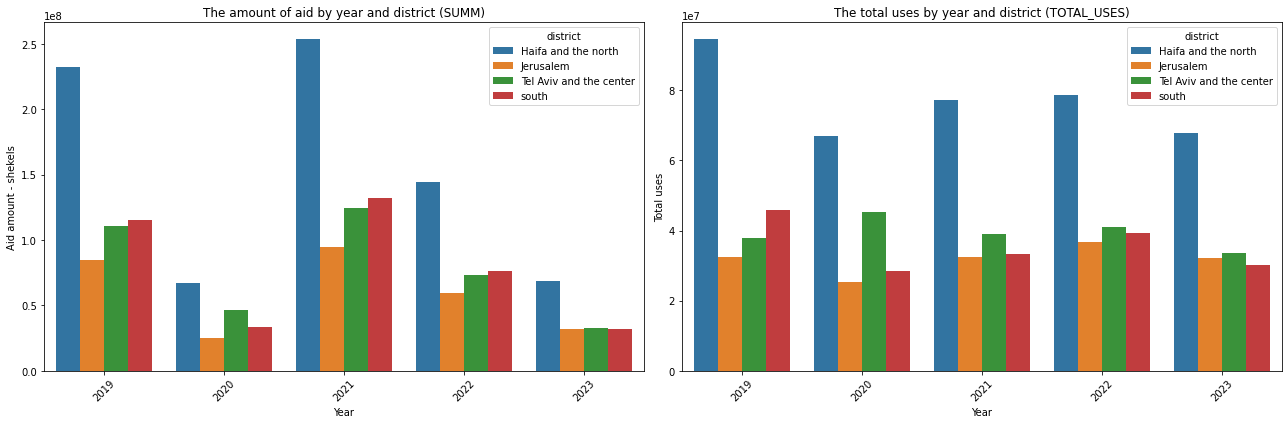

In [11]:
# השוואה בין העמודה שיצרנו ובין העמודה מתוך הדאטה
summ_per_year_district = df.groupby(['year', 'district'])['summ'].sum().reset_index()
pd.options.display.float_format = '{:,.2f}'.format

total_uses_per_year_district = df.groupby(['year', 'district'])['total_uses'].sum().reset_index()
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns

# יצירת גרפים
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# גרף ראשון - SUMM
sns.barplot(x='year', y='summ', hue='district', data=summ_per_year_district, ax=axes[0])

# תוספות לגרף הראשון
axes[0].set_title('The amount of aid by year and district (SUMM)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Aid amount - shekels')
axes[0].tick_params(axis='x', rotation=45)

# גרף שני - TOTAL_USES
sns.barplot(x='year', y='total_uses', hue='district', data=total_uses_per_year_district, ax=axes[1])

# תוספות לגרף השני
axes[1].set_title('The total uses by year and district (TOTAL_USES)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total uses')
axes[1].tick_params(axis='x', rotation=45)

# הצגת הגרפים
plt.tight_layout()
plt.show()


כפי שאפשר להסיק מכל הנתונים, אין אפשרות להשתמש בכל השנים מהדאטה מכוון שכל שנה מביאה נתונים שונים שמתייחסים לאותם ערים ומחוזות, ובסופו של דבר זה יוצר כפילויות שיכולות לשבש את המודל

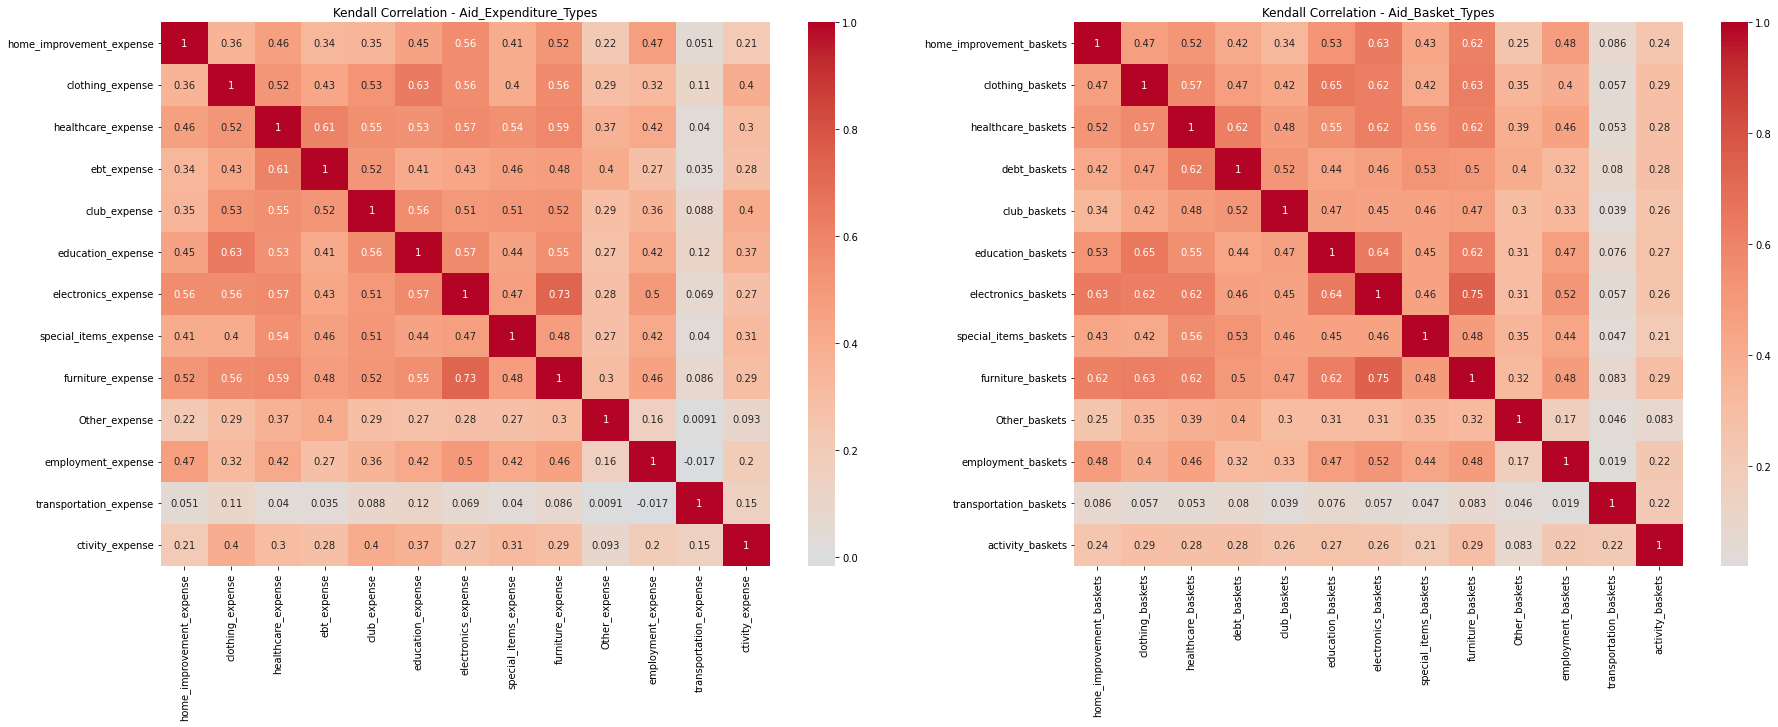

In [12]:
# עמודות של תחומים שונים מבחנת סלים 
Aid_Basket_Types = df.iloc[:, [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]]
# עמודות של הכספים מבחנת כל תחום   
Aid_Expenditure_Types = df.iloc[:, [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]]

#השוואה בין סלים לכספים והשוואה בעצמם

corrs1 = Aid_Expenditure_Types.corr(method='kendall')
corrs2 = Aid_Basket_Types.corr(method='kendall')


fig, axes = plt.subplots(1, 2, figsize=(30, 10))

# כספים
sns.heatmap(corrs1, cmap='coolwarm', center=0, annot=True, ax=axes[0])
axes[0].set_title("Kendall Correlation - Aid_Expenditure_Types")

# סלים
sns.heatmap(corrs2, cmap='coolwarm', center=0, annot=True, ax=axes[1])
axes[1].set_title("Kendall Correlation - Aid_Basket_Types")

# הצגת הגרפים
plt.show()

כבר ניתן לראות שהקורולציות מאוד דומות. האם כדאי לבחור להשתמש בפר סוג סיוע לפי מספר סלים ? לפי סכום כסף על כל סל ? או לפי מניפולציה בניהם ? כדיי לראות את זה נחשב את הסטיית תקן והממוצע עבור היחס בין מספר סלים לסכום כסף פר סל 

In [13]:
for i in range(6, 31, 2):  # המספרים מ-6 עד 30 בקפיצות של 2
    basket_col = i  # העמודה של הסלים
    expense_col = i + 1  # העמודה של הכספים
    new_col_name = f"Ratio_{df.columns[basket_col].split('_')[0]}_baskets"  # יצירת שם חדש עבור כל תחום
    
    # חילוק כאשר יש אפס בעמודה
    df[new_col_name] = df.iloc[:, expense_col].replace(0, np.nan) / df.iloc[:, basket_col].replace(0, np.nan)
    
    # טיפול ב-NaN והמרתן ל-0
    df[new_col_name] = df[new_col_name].fillna(0)

# הצגת תוצאה כדי לוודא שהכל בוצע כהלכה
df.head()

# מציאת כל העמודות שיש בהן את המילה 'Ratio'
ratio_columns = [col for col in df.columns if 'Ratio' in col]

# חישוב הממוצע וסטיית התקן עבור כל עמודה שמכילה את המילה 'Ratio'
for col in ratio_columns:
    mean_value = df[col].mean()  # חישוב ממוצע
    std_value = df[col].std()    # חישוב סטיית תקן
    print(f"סטיית תקן עבור {col}: {std_value}")
    print(f"ממוצע עבור {col}: {mean_value}")
    print("--------------------------")

סטיית תקן עבור Ratio_home_baskets: 772.7777513531478
ממוצע עבור Ratio_home_baskets: 1853.8392451905945
--------------------------
סטיית תקן עבור Ratio_clothing_baskets: 425.05695174650526
ממוצע עבור Ratio_clothing_baskets: 1058.0951743220403
--------------------------
סטיית תקן עבור Ratio_healthcare_baskets: 630.4762074541858
ממוצע עבור Ratio_healthcare_baskets: 1540.2640574618458
--------------------------
סטיית תקן עבור Ratio_debt_baskets: 509.3591381497966
ממוצע עבור Ratio_debt_baskets: 1582.4480802070304
--------------------------
סטיית תקן עבור Ratio_club_baskets: 596.7305830988628
ממוצע עבור Ratio_club_baskets: 1038.4113688417776
--------------------------
סטיית תקן עבור Ratio_education_baskets: 426.34353659654346
ממוצע עבור Ratio_education_baskets: 1165.8069488419783
--------------------------
סטיית תקן עבור Ratio_electronics_baskets: 406.8888261546451
ממוצע עבור Ratio_electronics_baskets: 1768.0640539813476
--------------------------
סטיית תקן עבור Ratio_special_baskets: 695.76

כפי שאפשר לראות עומדות בפנינו האופציה או לקחת את העמודות החדשות שנוצרו משני עמודות פר סוג סיוע , או לבחור בעמודה אחת  - מספר סלים \ סך הכל סכום פר סיוע. מכוון שגם מטריצת הקורולציה דומה וגם הממוצעים וסטיות התקן. נשתמש רק בעמודה אחת - מספר סלים.(יותר קל להתמודד איתם ולא עם העמודות של סך הכל בשקלים פר סל)

---
>A summary of the Conclusions so far:
>
>* `Only one Year` - נשתמש רק בשנה אחת. בחרנו את 2019 כי יש לה את מספר השורות הגבוה ביותר והיא שנה מאוד מייצגת כי היא לפני הקורונה ולפני המלחמה
>* `Only the columns of the basket` - לפי שני הגראפים של מטריצת הקורולציה וחישוב סטיית תקן וממוצע של היחס בין העמודות


See documnetation [here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

---


---
<a id='section5'></a>
### 2. End-to-End Classification Pipeline:

In [14]:
### half of it coded by GPT ###
#חצי מהקוד פה (חוץ מהפייפ ליין וההכנה) הוא מצ'אט ג'י פי טי

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE  # יבוא של SMOTE לאיזון הקטגוריות

# נתונים שלך
data = df[df['year'] == 2019]

X = data[['home_improvement_baskets', 'clothing_baskets', 'healthcare_baskets', 
          'debt_baskets', 'club_baskets', 'education_baskets', 'electronics_baskets', 
          'special_items_baskets', 'furniture_baskets', 'Other_baskets', 
          'employment_baskets', 'transportation_baskets']]  # כל עמודות הסלים
y = data['district']  # ה-district הוא העמודה ה-Y

# חלוקה לנתוני אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# איזון הקטגוריות בנתוני האימון באמצעות SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# הגדרת המודלים להשוואה
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', max_iter=2000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('SVM', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# הגדרת הפייפליין עם סקלר למודל
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # סקאלאר
    ('model', LogisticRegression())  # המודל יוחלף במהלך הקרוס ולידיישן
])

# הגדרת פרמטרים ל-GridSearchCV עבור כל מודל
param_grids = {
    'Random Forest': {
        'model__n_estimators': [50, 100, 300, 500],
        'model__max_depth': [None, 10, 20, 50],
        'model__min_samples_split': [2, 5, 10, 20]
    },
    'Gradient Boosting': {
        'model__n_estimators': [50, 100, 300],
        'model__learning_rate': [0.01, 0.1, 0.2, 0.5],
        'model__max_depth': [3, 5, 7, 10]
    },
    'SVM': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__gamma': ['scale', 'auto', 0.1, 1]
    },
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga']
    },
    'K-Nearest Neighbors': {
        'model__n_neighbors': [1, 3, 5, 10, 15],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    }
}

# ביצוע GridSearchCV לכל מודל
best_models = {}

for name, model in models:
    # עדכון הפייפליין עם המודל הנוכחי
    pipeline.set_params(model=model)
    
    # ביצוע GridSearchCV עם פרמטרים מותאמים
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    
    # ביצוע החיפוש על נתוני האימון
    grid_search.fit(X_res, y_res)  # משתמשים בנתונים המאוזנים
    
    # שמירת המודל הטוב ביותר לכל אחד
    best_models[name] = grid_search

# הדפסת התוצאות בצורה מפורטת
for name, grid_search in best_models.items():
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    print()

# הדפסת תוצאות חוצה-ולידיישן (cross-validation)
print("Cross-Validation Results:")
for name, grid_search in best_models.items():
    print(f"{name}: {grid_search.best_score_:.4f}")

# הצגת סיכום ביצועים עבור כל המודל
print("\nPerformance Summary for All Models: ")
for name, grid_search in best_models.items():
    # חיזוי על נתוני הבדיקה
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # הצגת סיכום ביצועים עבור כל מודל
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred, target_names=np.unique(y_test), zero_division=1))

# בחירת המודל עם התוצאה הטובה ביותר
best_model_name = max(best_models, key=lambda x: best_models[x].best_score_)
best_model = best_models[best_model_name].best_estimator_

# אימון המודל הטוב ביותר
best_model.fit(X_res, y_res)  # אימון על נתונים מאוזנים

# חיזוי על נתוני הבדיקה
y_pred = best_model.predict(X_test)

# הצגת דיוק המודל הטוב ביותר
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTraining the best model: {best_model_name}")
#print(f"Accuracy: {accuracy:.4f}")

# הצגת סיכום ביצועים
print("\nEvaluation:")
print(classification_report(y_test, y_pred, target_names=np.unique(y_test), zero_division=1))

C:\Users\yuval\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\yuval\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\yuval\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for Logistic Regression: {'model__C': 100, 'model__solver': 'saga'}
Best cross-validation score: 0.7447

Best parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best cross-validation score: 0.8342

Best parameters for SVM: {'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best cross-validation score: 0.8515

Best parameters for K-Nearest Neighbors: {'model__n_neighbors': 1, 'model__p': 1, 'model__weights': 'uniform'}
Best cross-validation score: 0.8102

Best parameters for Gradient Boosting: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300}
Best cross-validation score: 0.8225

Cross-Validation Results:
Logistic Regression: 0.7447
Random Forest: 0.8342
SVM: 0.8515
K-Nearest Neighbors: 0.8102
Gradient Boosting: 0.8225

Performance Summary for All Models: 

Logistic Regression:
                         precision    recall  f1-score   support

    Haifa and the n

* Confusion Matrix
<a id='section11'></a>

Model: Logistic Regression
Confusion Matrix:


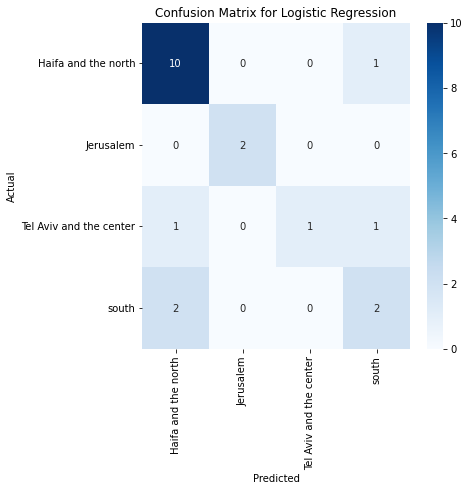

Model: Random Forest
Confusion Matrix:


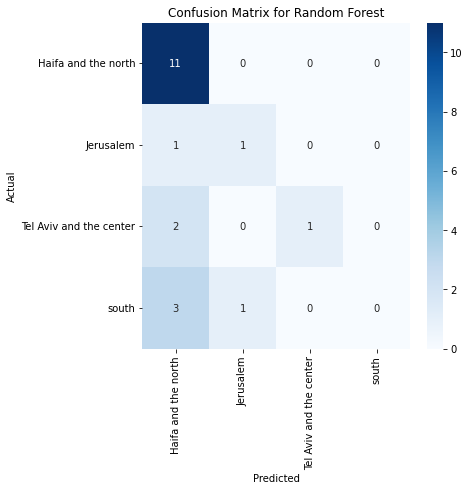

Model: SVM
Confusion Matrix:


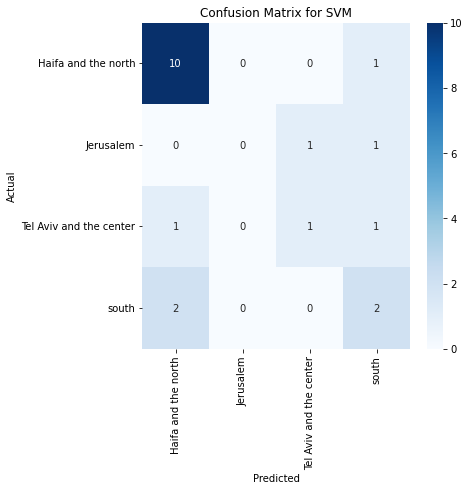

Model: K-Nearest Neighbors
Confusion Matrix:


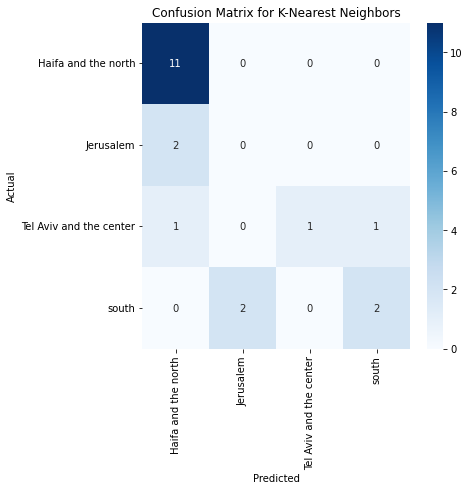

Model: Gradient Boosting
Confusion Matrix:


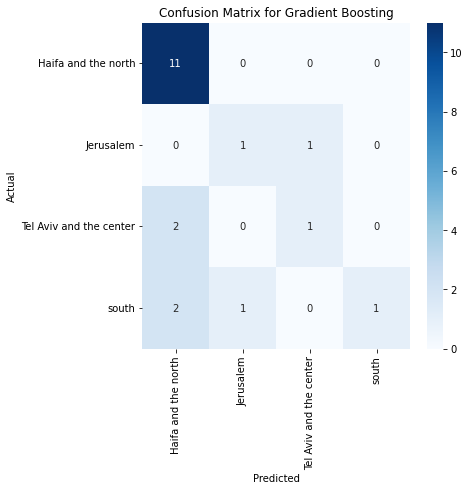

The best model is: Logistic Regression with score: 70


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# שמות מחוזות
labels = ['Haifa and the north', 'Jerusalem', 'Tel Aviv and the center', 'south']

# משתנה לאחסון המודל הטוב ביותר על סמך ציון TP
best_model_name = None
best_score = -1  # התחלה עם ערך נמוך, כי TP לא יכול להיות שלילי

# עבור כל מודל מה-bes_models, נבצע את הפעולות הבאות:
for name, grid_search in best_models.items():
    print(f"Model: {name}")
    
    # קבלת המודל הטוב ביותר מתוך ה-GridSearch
    best_model = grid_search.best_estimator_
    
    # אימןו
    best_model.fit(X_train, y_train)  

    # חיזוי
    y_pred = best_model.predict(X_test)   
    # חישוב מטריצת הבלבול
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    # חישוב TP, FP, FN, TN לכל קטגוריה
    TP = np.diagonal(cm) 
    FP = np.sum(cm, axis=0) - TP 
    FN = np.sum(cm, axis=1) - TP 
    TN = np.sum(cm) - (TP + FP + FN)  

    # ציון המבוסס על TP ו-TN
    score = np.sum(TP + TN)  # חיבור של כל ה-TP ו-TN

    # הדפסת מטריצת בלבול
    print("Confusion Matrix:")
    
    # הצגת מטריצת בלבול כגרף
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # בדיקה אם המודל הנוכחי הוא הטוב ביותר
    if score > best_score:
        best_score = score
        best_model_name = name

# הצגת המודל הכי טוב
print(f"The best model is: {best_model_name} with score: {best_score}")


In [17]:

for name, grid_search in best_models.items():
    print(f"Model: {name}")
    
    # קבלת המודל הטוב ביותר מתוך ה-GridSearch
    best_model = grid_search.best_estimator_
    
    # אימון וזה
    best_model.fit(X_train, y_train)  

    # ביצוע חיזוי על הקבוצת בדיקה
    y_pred = best_model.predict(X_test)   
    # חישוב מטריצת הבלבול
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    # הדפסת מטריצת הבלבול עבור כל מודל
    print(cm)
    
    ###CODE BY GPT###
    # חישוב TP, FP, FN, TN לכל קטגוריה
    TP = np.diagonal(cm)  
    FP = np.sum(cm, axis=0) - TP  
    FN = np.sum(cm, axis=1) - TP
    TN = np.sum(cm) - (TP + FP + FN) 

    # ציון המבוסס על TP ו-TN
    score = np.sum(TP + TN)  # חיבור של כל ה-TP ו-TN

    # בדיקה אם המודל הנוכחי הוא הטוב ביותר
    if score > best_score:
        best_score = score
        best_model_name = name


print("The best model is",best_model_name," with score: ",best_score)


Model: Logistic Regression
[[10  0  0  1]
 [ 0  2  0  0]
 [ 1  0  1  1]
 [ 2  0  0  2]]
Model: Random Forest
[[11  0  0  0]
 [ 1  1  0  0]
 [ 1  0  1  1]
 [ 2  1  0  1]]
Model: SVM
[[10  0  0  1]
 [ 0  0  1  1]
 [ 1  0  1  1]
 [ 2  0  0  2]]
Model: K-Nearest Neighbors
[[11  0  0  0]
 [ 2  0  0  0]
 [ 1  0  1  1]
 [ 0  2  0  2]]
Model: Gradient Boosting
[[11  0  0  0]
 [ 0  1  1  0]
 [ 1  0  1  1]
 [ 2  1  0  1]]
The best model is Logistic Regression  with score:  70


---
>A summary:
>
>Pipeline
>* `Data Preprocessing` - ביצוע חלוקת הנתונים לאימון ולבדיקה, שימוש ב-SMOTE לאיזון הקטגוריות וסטנדרטיזציה של הנתונים.
>* `Feature Engineering` - בחירת העמודות המתאימות (הסלים השונים) וביצוע חילוק הנתונים.
>* `Model selection` - חמישה מודלים שאחכ נוכל לראות מה יהיו הפרטמרטים הכי טובים לכל אחד ואיזה מודל יקבל את הציון הגבוה ביותר משאר המודלים
>* `Feature Engineering` - בחירת העמודות המתאימות (הסלים השונים) וביצוע חילוק הנתונים.
>* `Training` - אימון המודלים על הנתונים המאוזנים 
>* `Evaluation` - הערכת המודלים על פי דיוק וציון סיכום, כולל הצגת classification report.
>* `Interpretation` - בדיקת התוצאות והצגת המודל הטוב ביותר על פי ציון ה-cross-validation.
>
>confusion_matrix
>* למרות הניסוים לאזן את הקטוגרויות בפייפ- ליין התוצאות של המודל הכדאי לא היו חד משמעיות לכן הוספנו עוד בדיקה.
---

---
<a id='section6'></a>
## 3. Unsupervised Analysis


<a id='section7'></a>
* K-means

For n_clusters = 3 The average silhouette_score is: 0.5290519251806812
For n_clusters = 4 The average silhouette_score is: 0.5392017099780663
For n_clusters = 5 The average silhouette_score is: 0.4898519159406643
For n_clusters = 6 The average silhouette_score is: 0.34844840535314914
For n_clusters = 7 The average silhouette_score is: 0.3424292013634444


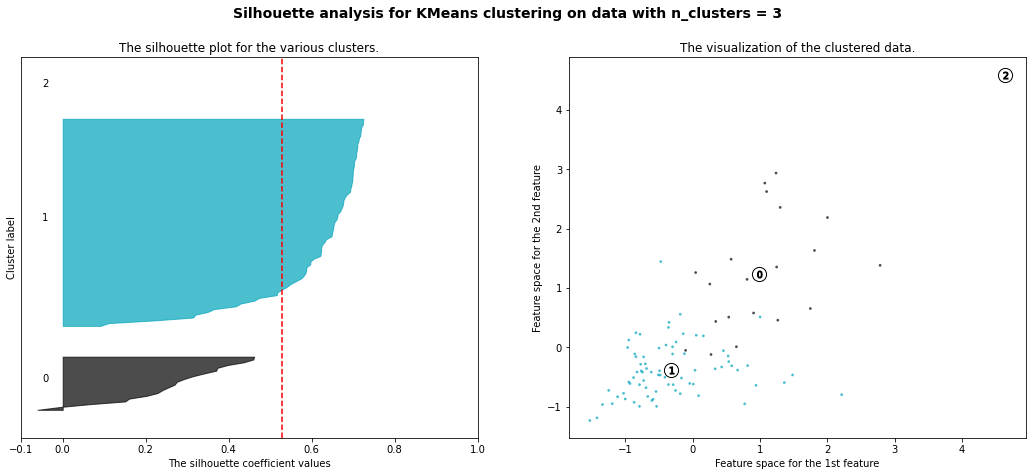

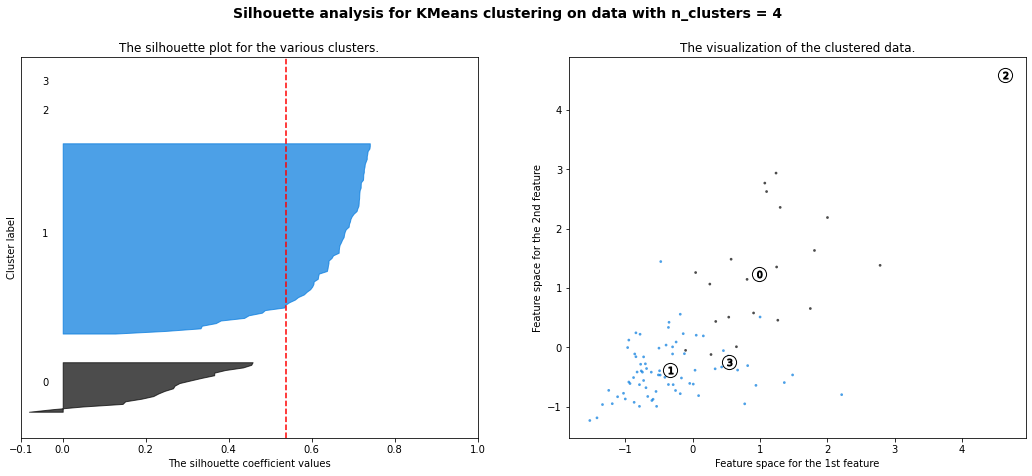

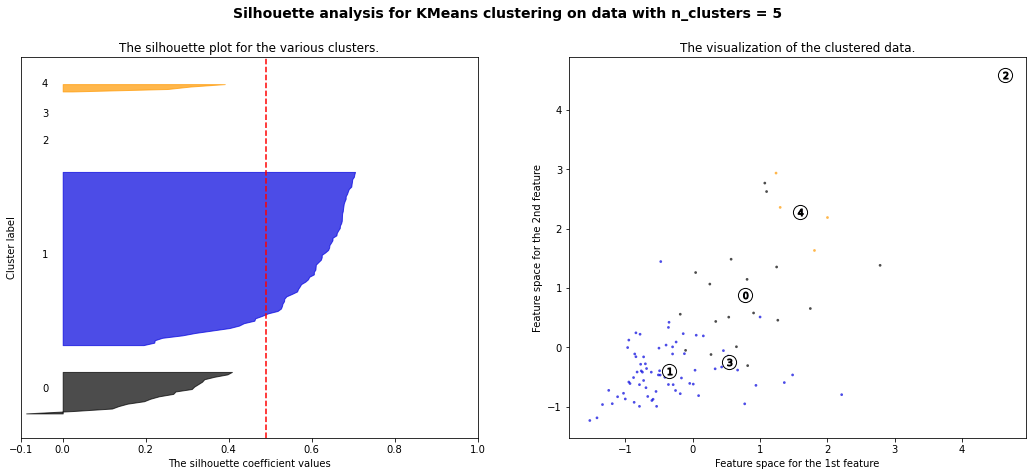

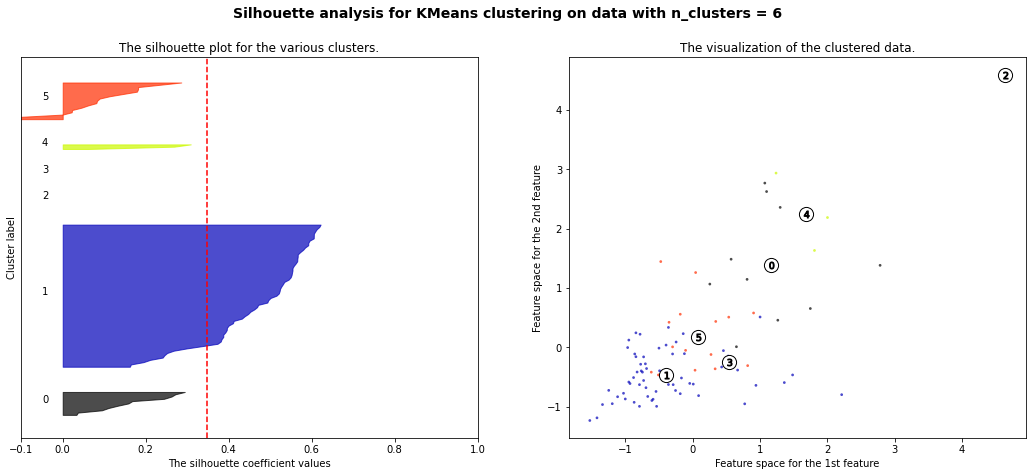

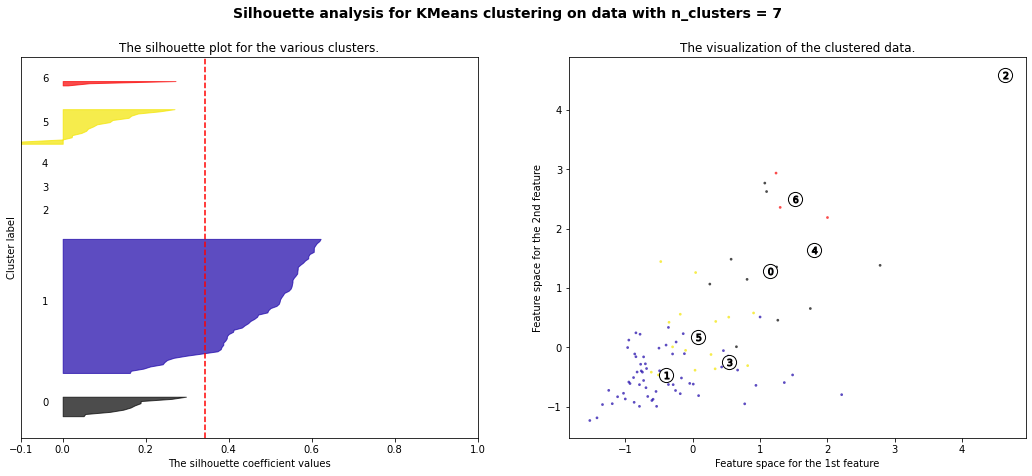

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler


columns_to_use = ['home_improvement_baskets', 'clothing_baskets', 'healthcare_baskets',
                  'debt_baskets', 'club_baskets', 'education_baskets', 'electronics_baskets',
                  'special_items_baskets', 'furniture_baskets', 'Other_baskets',
                  'employment_baskets', 'transportation_baskets', 'summ']

#ניקוי דאטה
data = data[columns_to_use].dropna()  
scaler = StandardScaler()  
data_scaled = scaler.fit_transform(data)

# טווח של מספר קלאסטרים לבחינה
range_n_clusters = [3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # יצירת גרפים (Silhouette Plot ו-VISUALIZATION)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # גרף 1: silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_scaled)

    # חישוב ה-silhouette score הכולל
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

    # חישוב הערכים הסילואטיים לכל דגימה
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # רווח בין הקלאסטרים

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # שורת ציון ממוצע של silhouette
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # מסיר תוויות מהציר y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # גרף 2: הדמיה של הקלאסטרים
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # מוסיף את מרכזי הקלאסטרים
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<a id='section8'></a>
* Agglomerative Clustering

Testing for 3 clusters:
Silhouette Score for 3 clusters: 0.5062058218928224


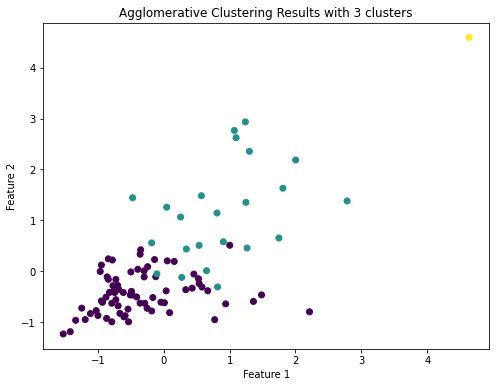

Testing for 4 clusters:
Silhouette Score for 4 clusters: 0.5166342410201574


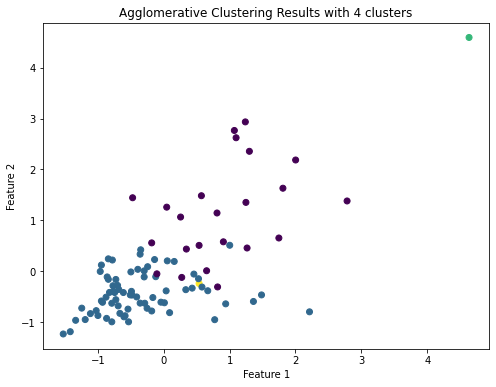

Testing for 5 clusters:
Silhouette Score for 5 clusters: 0.43139544518701406


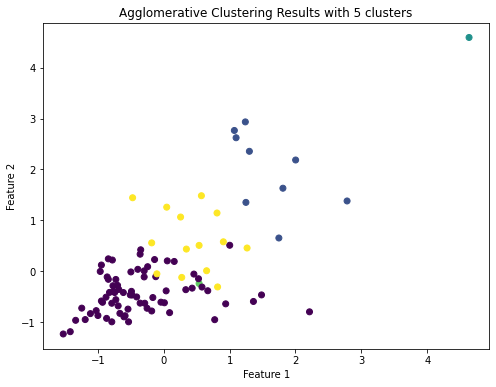

In [19]:
###CODE BY GPT###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


# בודק קלאסטרים עם 3, 4, 5 קלאסטרים
for n_clusters in range(3, 6):
    print(f"Testing for {n_clusters} clusters:")
    
    # יצירת אלגוריתם Agglomerative Clustering
    agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_clust.fit_predict(data_scaled)
    
    # חישוב מדד ה-Silhouette
    silhouette_avg = silhouette_score(data_scaled, agg_labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")
    
    # הצגת הקלאסטרים בגרף
    plt.figure(figsize=(8, 6))
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=agg_labels, cmap='viridis')
    plt.title(f'Agglomerative Clustering Results with {n_clusters} clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


<a id='section9'></a>
* Comparison between the algorithms

KMeans Results:
Best Silhouette Score: 0.5392017099780663
Best Number of Clusters: 4

Agglomerative Clustering Results:
Best Silhouette Score: 0.5166342410201574
Best Number of Clusters: 4


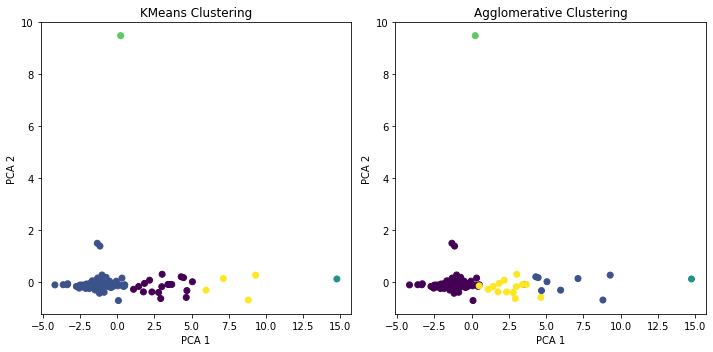

In [20]:
# עבור KMeans
best_silhouette_kmeans = -1  # נתחיל עם ערך נמוך
best_kmeans_clusters = 0  # מספר הקלאסטרים הכי טוב

for n_clusters in range(3, 6):  # נבדוק בין 2 ל-5 קלאסטרים
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, kmeans_labels)
    
    if silhouette_avg > best_silhouette_kmeans:
        best_silhouette_kmeans = silhouette_avg
        best_kmeans_clusters = n_clusters

# עבור Agglomerative Clustering
best_silhouette_agg = -1  # נתחיל עם ערך נמוך
best_agg_clusters = 0  # מספר הקלאסטרים הכי טוב

for n_clusters in range(3, 6):  # נבדוק בין 2 ל-5 קלאסטרים
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, agg_labels)
    
    if silhouette_avg > best_silhouette_agg:
        best_silhouette_agg = silhouette_avg
        best_agg_clusters = n_clusters
# השוואה בין האלגוריתמים
print("KMeans Results:")
print(f"Best Silhouette Score: {best_silhouette_kmeans}")
print(f"Best Number of Clusters: {best_kmeans_clusters}")

print("\nAgglomerative Clustering Results:")
print(f"Best Silhouette Score: {best_silhouette_agg}")
print(f"Best Number of Clusters: {best_agg_clusters}")

#########################################################################################################################################
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
    
# הפעל את ה-PCA כדי להוריד את הדאטה ל-2 ממדים (או 3 ממדים אם רוצים תלת-ממדי)
pca = PCA(n_components=2)  # שים 3 אם רוצים תלת ממדי
data_pca = pca.fit_transform(data_scaled)

# גרפים דו-ממדיים להשוואה
plt.figure(figsize=(10, 5))

# KMeans
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title("KMeans Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Agglomerative Clustering
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels, cmap='viridis', marker='o')
plt.title("Agglomerative Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()

# גרף תלת-ממדי להשוואה (אם רוצים)
if pca.n_components == 3:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # KMeans - תלת ממדי
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=kmeans_labels, cmap='viridis')
    ax.set_title("KMeans Clustering (3D)")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_zlabel("PCA 3")
    plt.show()

    # Agglomerative Clustering - תלת ממדי
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=agg_labels, cmap='viridis')
    ax.set_title("Agglomerative Clustering (3D)")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_zlabel("PCA 3")
    plt.show()


 חילק את הדאטה בצורה יותר נכונה ולכן הוא המודל שייבחר - K-means

<a id='section10'></a>
* Clustering with the Selected Model and Outlier Detection

Centers of clusters:
[[ 0.9928284   1.23251731  1.4515956   1.3990469   1.22244639  1.31389318
   1.22309977  1.22893677  1.13526601  1.11158434  1.12489546 -0.07831585
   1.26855093]
 [-0.33822245 -0.39195561 -0.44477641 -0.40120161 -0.41303958 -0.41852592
  -0.40427602 -0.35097389 -0.39516179 -0.34092605 -0.35164964 -0.105167
  -0.40994975]
 [ 4.63493094  4.59652607  4.07990491  1.56933747  5.57657986  4.0669623
   5.63227253  1.78404729  6.4722983   2.6403723   3.89199096 -0.15886929
   5.3019821 ]
 [ 0.5369623  -0.24215677 -0.1983627   0.13864342  0.53942128  0.6260924
  -0.17784279 -0.39071485  0.06435396  0.35646872 -0.36782649  9.50754395
  -0.33671908]]
Cluster profiles (average of features for each cluster):
         home_improvement_baskets  clothing_baskets  healthcare_baskets  \
Cluster                                                                   
0                          287.95          1,056.65              497.60   
1                          136.26            363

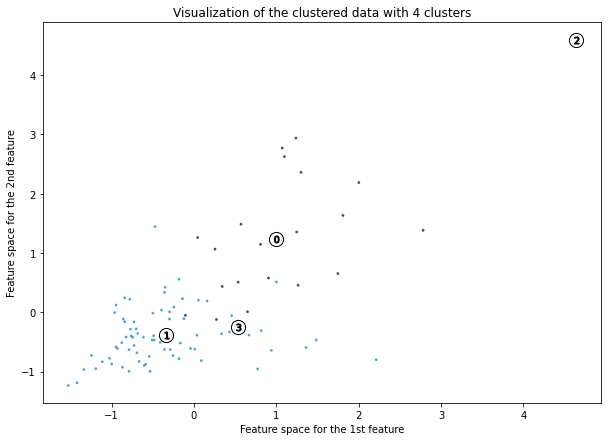

Outliers detected:
    home_improvement_baskets  clothing_baskets  healthcare_baskets  \
1                     703.00          2,493.00              986.00   
4                     236.00            427.00              191.00   
71                    316.00          1,784.00              559.00   
72                    381.00          1,227.00              860.00   
73                    403.00          1,464.00              689.00   

    debt_baskets  club_baskets  education_baskets  electronics_baskets  \
1       1,189.00      1,348.00           1,438.00             2,848.00   
4         511.00        310.00             516.00               449.00   
71      2,354.00        805.00             802.00             1,231.00   
72      1,798.00        587.00             990.00             1,414.00   
73      2,502.00        578.00           1,158.00             1,893.00   

    special_items_baskets  furniture_baskets  Other_baskets  \
1                  309.00           3,342.00        

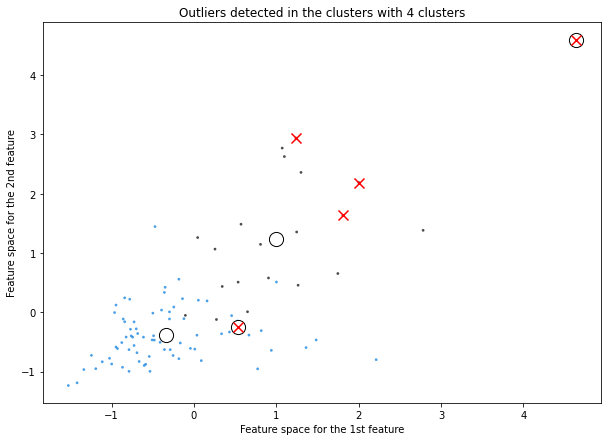

In [21]:
import matplotlib.cm as cm

# הגדרת מספר הקלאסטרים
n_clusters = 4

# יצירת המודל והפעלת KMeans על הנתונים המותאמים
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(data_scaled)

# הוספת תוצאות הקלאסטרים לדאטה
data['Cluster'] = cluster_labels

# הצגת מרכזי הקלאסטרים
centers = clusterer.cluster_centers_
print("Centers of clusters:")
print(centers)

# הצגת פרופילים של כל קלאסטר (ממוצע עבור כל משתנה)
cluster_profiles = data.groupby('Cluster').mean()
print("Cluster profiles (average of features for each cluster):")
print(cluster_profiles)

# 2. הדמיית הקלאסטרים
plt.figure(figsize=(10, 7))
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# הוספת מרכזי הקלאסטרים לגרף
plt.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

plt.title(f"Visualization of the clustered data with {n_clusters} clusters")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.show()

# 3. בדיקה אם יש חריגים (Outliers) בתוך הקלאסטרים
from sklearn.neighbors import NearestNeighbors

# אנחנו יכולים לבדוק חריגות על ידי מדידת מרחקים לקלאסטרים
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# חישוב המדד "החריגות" עבור כל דגימה - דגימות עם מרחק גבוה נחשבות לחריגות
outlier_scores = distances[:, -1]  # המרחק הכי רחוק מתוך 5 השכנים
threshold = np.percentile(outlier_scores, 95)  # לדוגמה, כל ערך שהוא מעל אחוזון 95 נחשב לחריג

# הצגת הדגימות החריגות
outliers = data[outlier_scores > threshold]
print("Outliers detected:")
print(outliers)

# הצגת החריגים על הגרף
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# הוספת מרכזי הקלאסטרים לגרף
plt.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

# סימון חריגים בצבע אדום
outliers_scaled = scaler.transform(outliers[columns_to_use])  # להמיר את החריגים חזרה ל-scale
plt.scatter(outliers_scaled[:, 0], outliers_scaled[:, 1], color='red', s=100, marker='x')

plt.title(f"Outliers detected in the clusters with {n_clusters} clusters")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.show()

---
>A summary:
>
>* `K-means`
>* `Agglomerative Clustering` 
>* `Comparison between the algorithms` 
>* `Clustering with the Selected Model and Outlier Detection` >

---

---
>## END:
>#####  ❤️

---
